In [2]:
# load required libraries
library(tidyverse)
library(janitor)
library(dplyr)
library(ggplot2)
library(skimr)
library(purrr)
library(lubridate)

source("../../R/apply_factors.R")
source("../../R/analysis_helpers.R")
source("../../R/temporal_helpers.R")
tables <- list(
  Orders   = readr::read_csv("../../data/processed/Orders.csv"),
  Returns  = readr::read_csv("../../data/processed/Returns.csv"),
  People   = readr::read_csv("../../data/processed/People.csv")
)
tables <- apply_factors(tables)
orders <- tables$Orders 
returns <- tables$Returns
people <- tables$People

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 51290 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): order_id, ship_mode, customer_name, segment, state, country, mark...
dbl   (6): sales, quantity, discount, profit, shipping_cost, year
date  (2): order_date, ship_date

ℹ Use `spec()` to retrieve the full column specification f

# Executive Overview

### Total Sales vs Total Profit

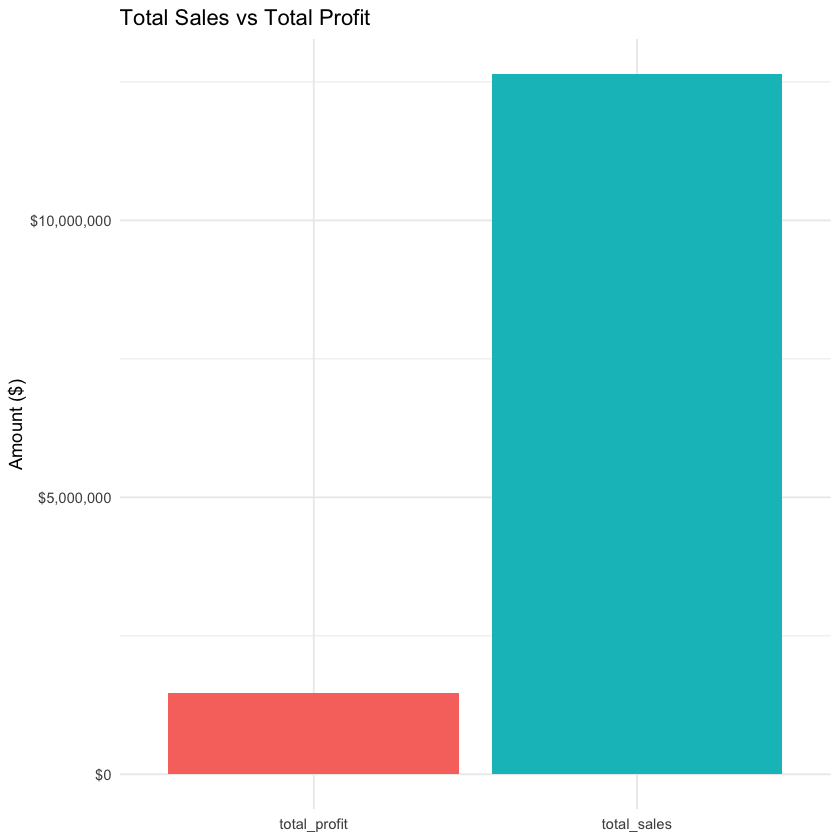

In [3]:
overall_totals <- orders %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit)
    ) %>%
    pivot_longer(everything(), names_to = "metric", values_to = "value")

ggplot(overall_totals, aes(x = metric, y = value, fill = metric)) +
    geom_col(show.legend = FALSE) +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Total Sales vs Total Profit",
        x = NULL,
        y = "Amount ($)"
    ) +
    theme_minimal()

### Sales & Profit by Category/Sub-Category/Product

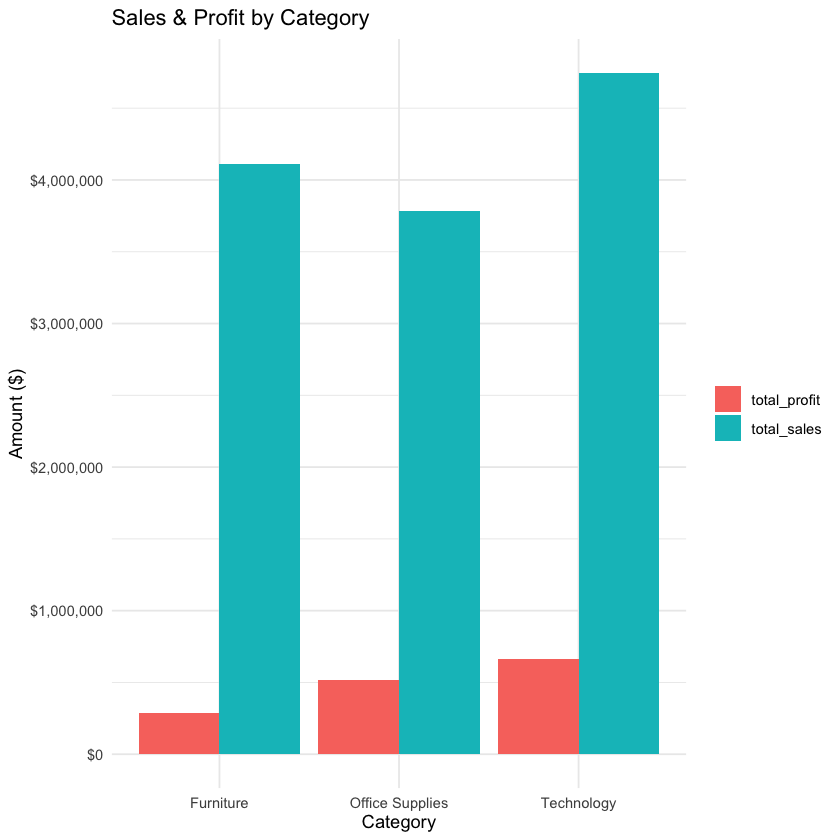

In [ ]:
category_perf <- orders %>%
    group_by(category) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

ggplot(category_perf, aes(x = category, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Category",
        x = "Category",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

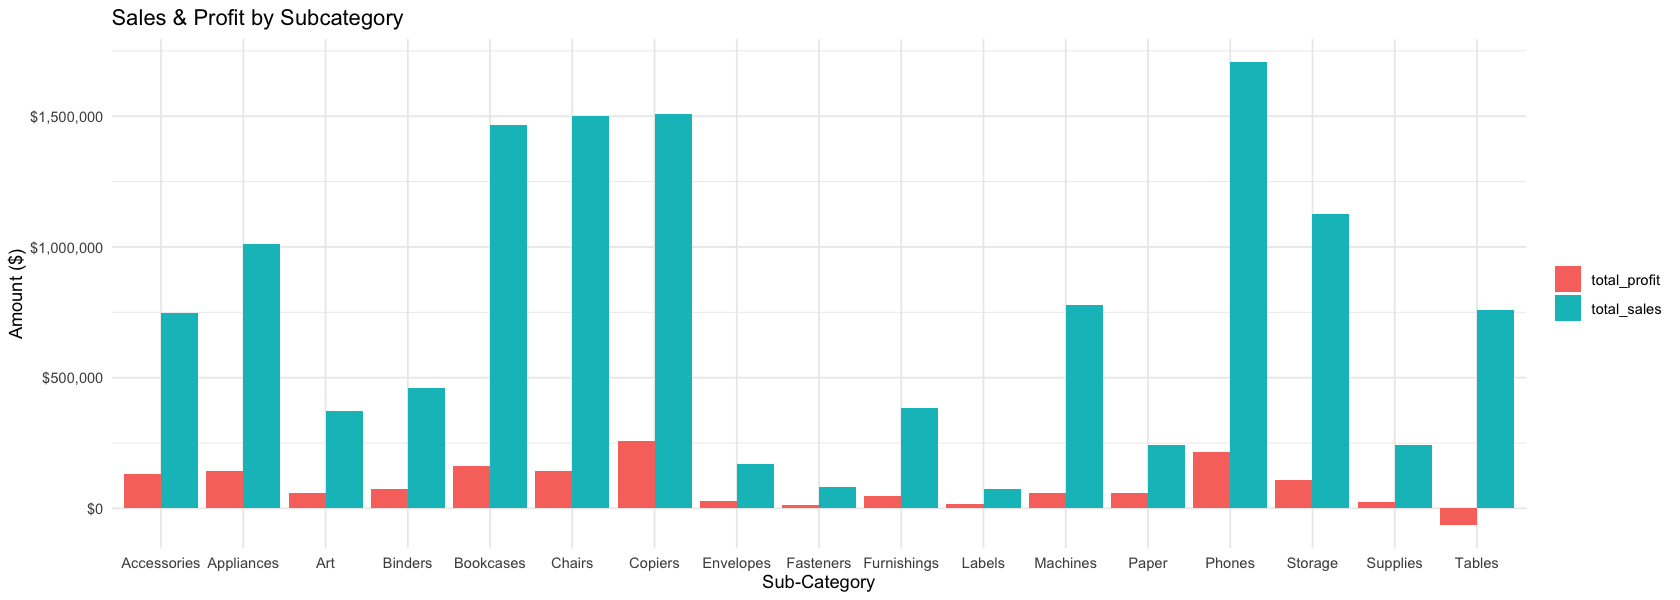

In [ ]:
subcategory_perf <- orders %>%
    group_by(sub_category) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

options(repr.plot.width = 14, repr.plot.height = 5)
ggplot(subcategory_perf, aes(x = sub_category, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Sub-Category",
        x = "Sub-Category",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

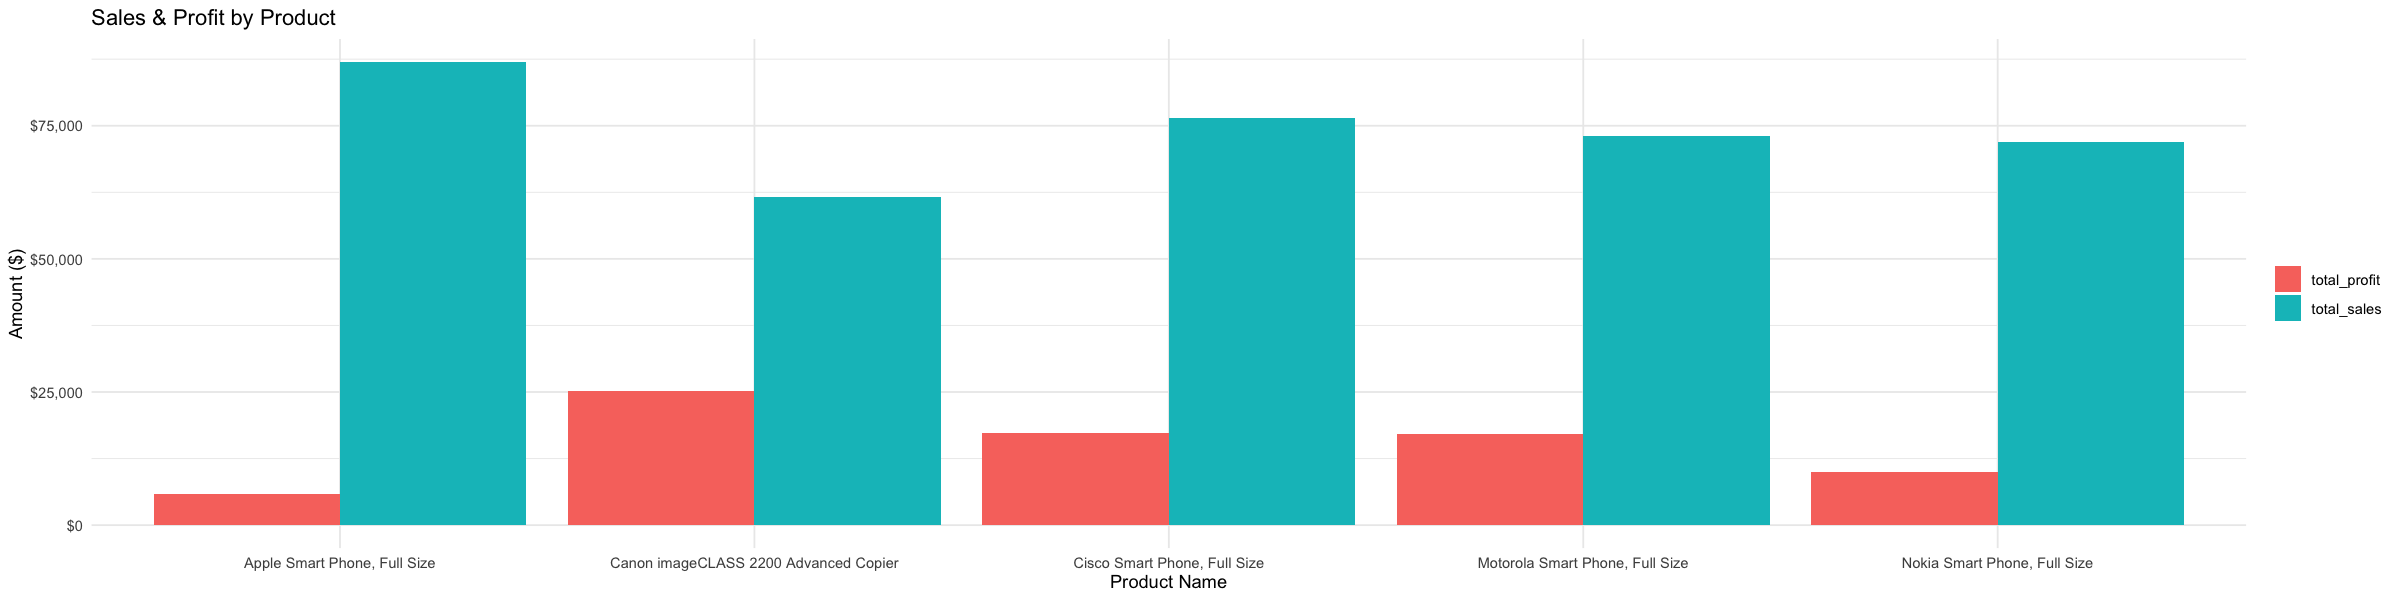

In [12]:
product_perf <- orders %>%
    group_by(product_name) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    slice_max(total_sales, n = 5) %>%   
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

options(repr.plot.width = 20, repr.plot.height = 5)
ggplot(product_perf, aes(x = product_name, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Product",
        x = "Product Name",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

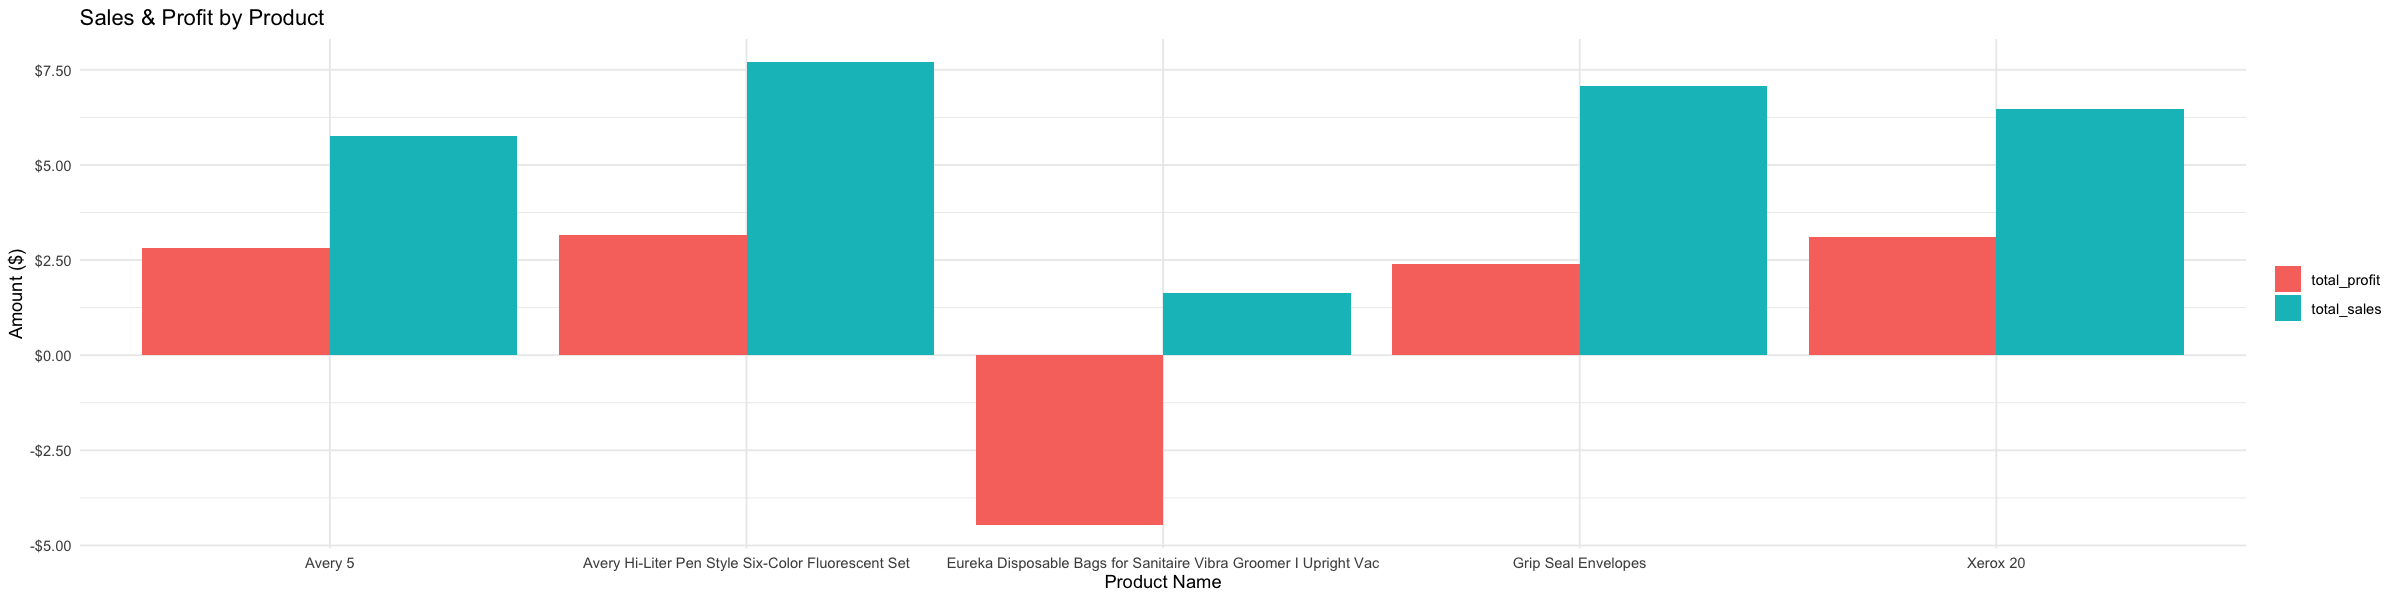

In [13]:
product_perf <- orders %>%
    group_by(product_name) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        .groups = "drop"
    ) %>%
    slice_min(total_sales, n = 5) %>%   
    pivot_longer(
        cols = c(total_sales, total_profit),
        names_to = "metric",
        values_to = "value"
    )

options(repr.plot.width = 20, repr.plot.height = 5)
ggplot(product_perf, aes(x = product_name, y = value, fill = metric)) +
    geom_col(position = "dodge") +
    scale_y_continuous(labels = scales::dollar_format()) +
    labs(
        title = "Sales & Profit by Product",
        x = "Product Name",
        y = "Amount ($)",
        fill = NULL
    ) +
    theme_minimal()

### Profit Margin by Category/Sub-Category/Product

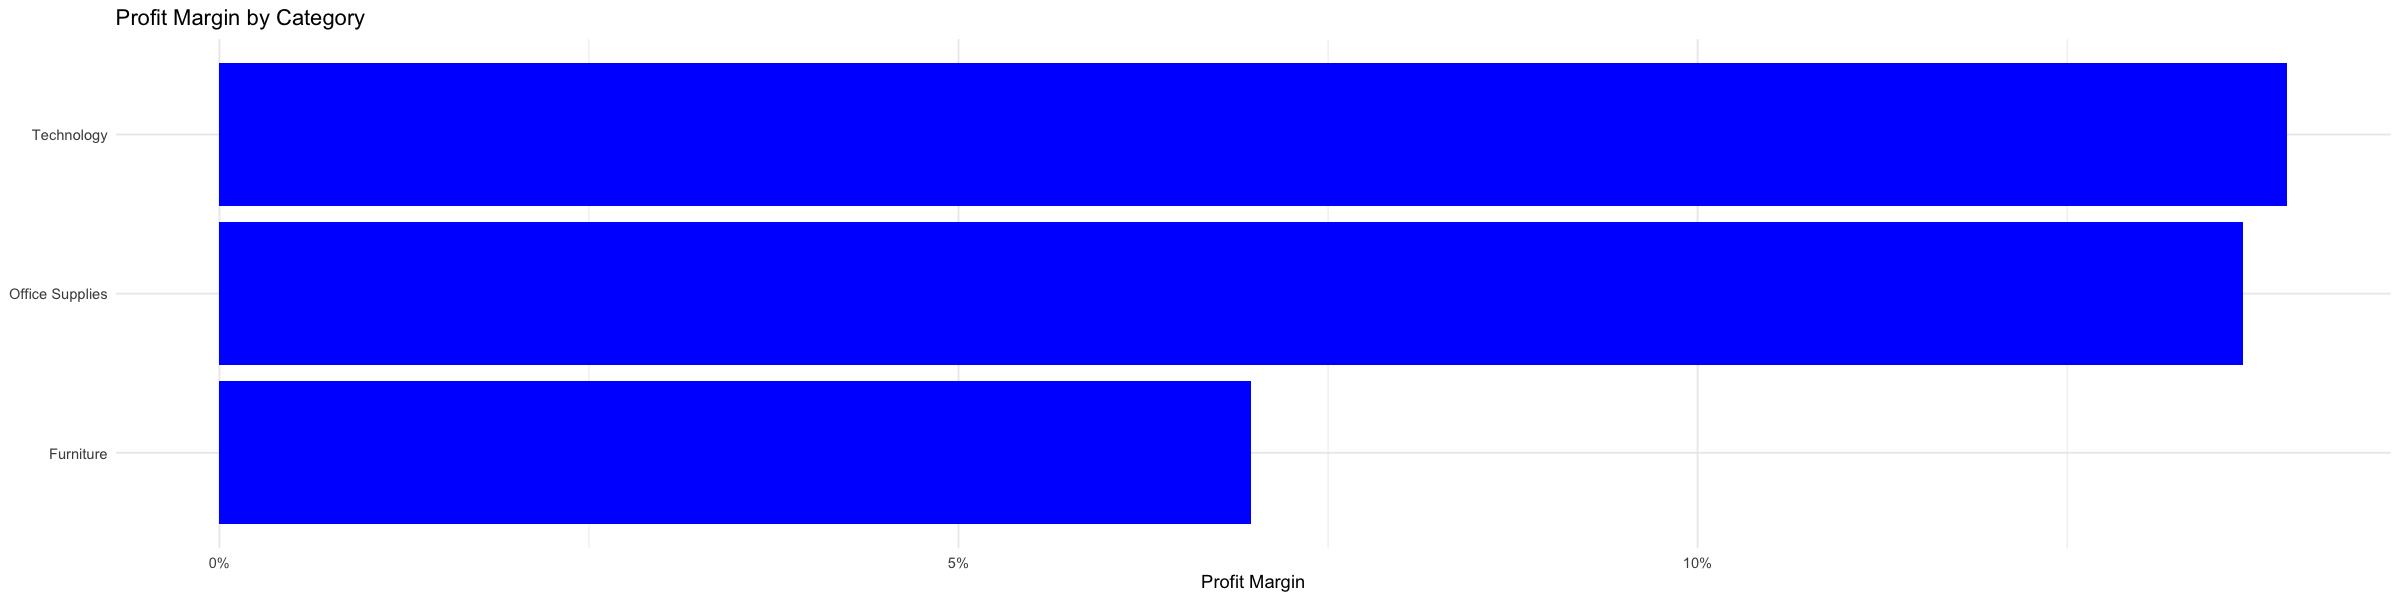

In [ ]:
category_margin <- orders %>%
    group_by(category) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    )

ggplot(category_margin, aes(x = reorder(category, profit_margin), y = profit_margin)) +
    geom_col(fill = "blue") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    coord_flip() +
    labs(
        title = "Profit Margin by Category",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

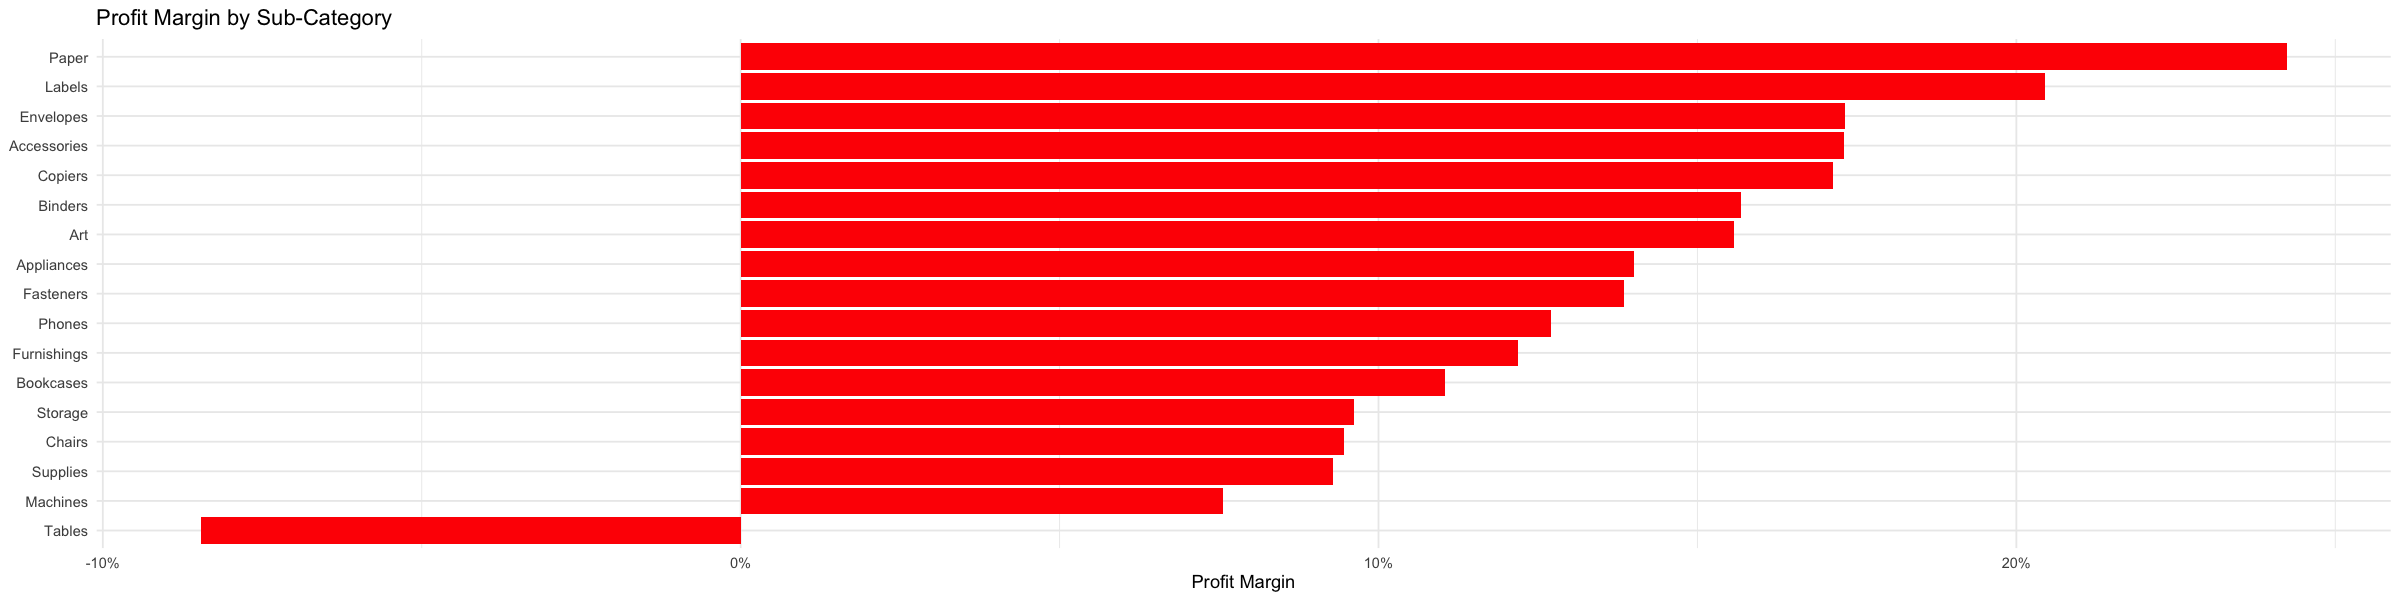

In [ ]:
subcategory_margin <- orders %>%
    group_by(sub_category) %>%
    summarise(
        total_sales  = sum(sales),
        total_profit = sum(profit),
        profit_margin = total_profit / total_sales,
        .groups = "drop"
    )

ggplot(subcategory_margin, aes(x = reorder(sub_category, profit_margin), y = profit_margin)) +
    geom_col(fill = "red") +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    coord_flip() +
    labs(
        title = "Profit Margin by Sub-Category",
        x = NULL,
        y = "Profit Margin"
    ) +
    theme_minimal()

### Sales vs Profit scatter

In [ ]:
ggplot(orders, aes(x = sales, y = profit, color = category)) +
  geom_point(alpha = 0.4) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  scale_x_continuous(labels = scales::dollar_format()) +
  scale_y_continuous(labels = scales::dollar_format()) +
  labs(
    title = "Sales vs Profit per Order",
    x = "Sales ($)",
    y = "Profit ($)",
    color = "Category"
  ) +
  theme_minimal()


# Product/Sub-Category/Category-Level Performance

### Category share of total sales

### Category share of total profit

### Profit margin by category

### Sub-Category share of total sales

### Sub-Category share of total profit

### Profit margin by sub-category

### Product share of total sales

### Product share of total profit

### Profit margin by product

# Discount & Pricing Effects

### Discount vs Profit scatter

### Average discount by category

### Average discount by sub-category

### Average discount by product

# Order Value & Volume Summary

### Distribution of order sales

### Top X% of orders vs total sales contribution